In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\srrml\\Desktop\\ML assignments\\Lab06-srishti7103\\clustering-using-scikit-learn-srishti7103\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

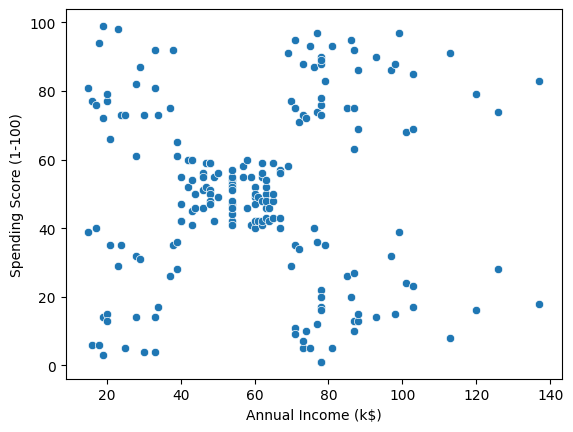

In [ ]:
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)')

DATA PREPROCCESING

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

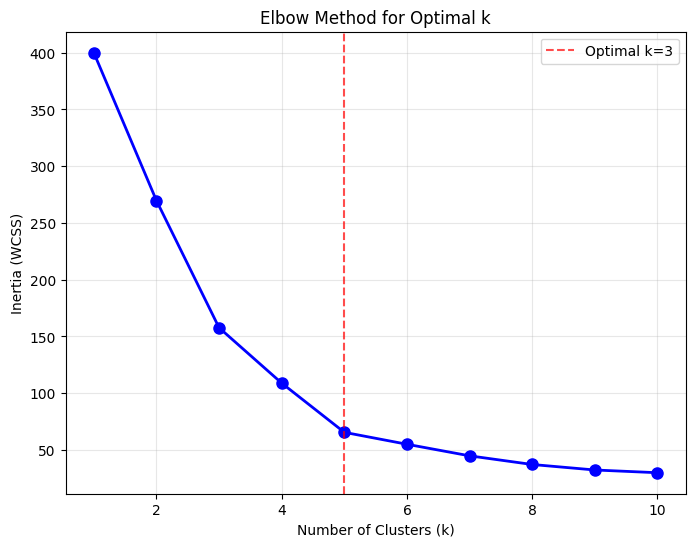

In [14]:
result = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    result.append(kmeans_temp.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, result, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Optimal k=3')
plt.legend()
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("K-Means cluster centers:")
print(kmeans.cluster_centers_)

print("\nCluster assignments:")
print(np.bincount(kmeans_labels))

print(f"\nInertia (WCSS): {kmeans.inertia_:.2f}")
print("\nCluster labels:")
print(kmeans.labels_)

K-Means cluster centers:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Cluster assignments:
[81 39 22 35 23]

Inertia (WCSS): 65.57

Cluster labels:
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


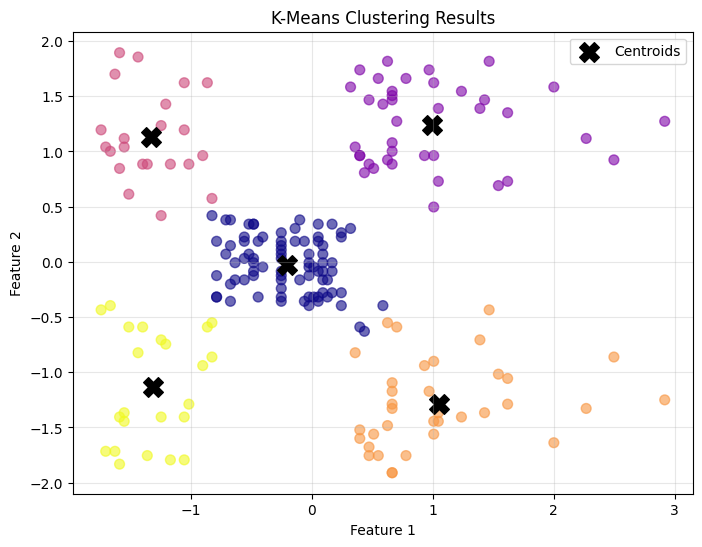

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='plasma', s=50, alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='black', s=200, marker='X', label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

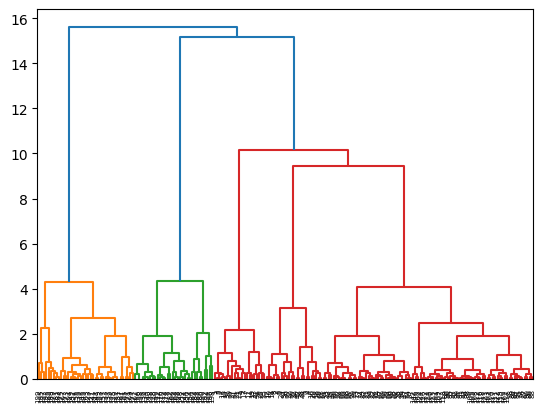

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X_scaled, method='ward', metric='euclidean')
dn = dendrogram(linkage_data)

In [18]:
hc = AgglomerativeClustering(n_clusters = 6,linkage ='ward')
hierarchy_label=hc.fit_predict(X_scaled)

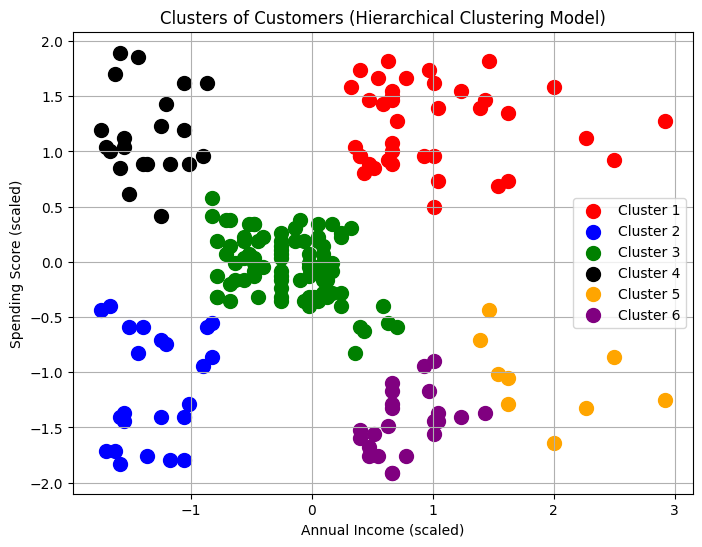

In [29]:
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'black', 'orange', 'purple']
labels = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6']

plt.figure(figsize=(8,6))
for i in range(6):
    plt.scatter(X_scaled[hierarchy_label == i, 0],
                X_scaled[hierarchy_label == i, 1],
                s=100, c=colors[i], label=labels[i])

plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

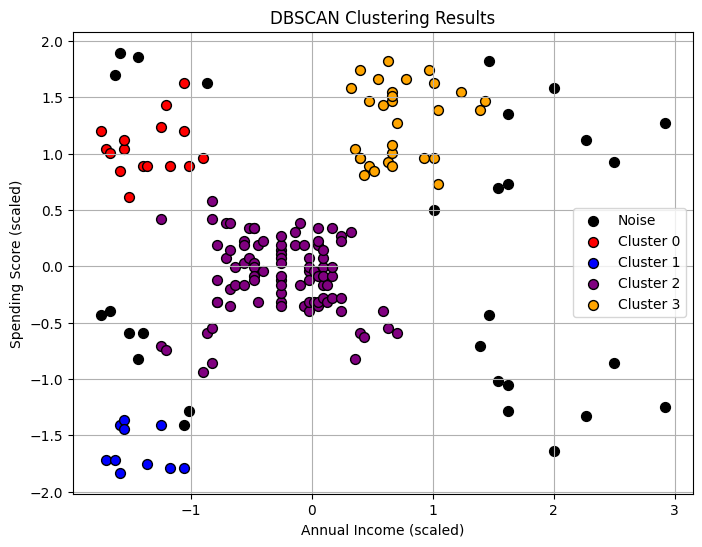

In [31]:
dbscan = DBSCAN(eps=0.45, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)


labels = dbscan_labels
unique_labels = np.unique(labels)

plt.figure(figsize=(8,6))

colors = ['green','red','blue','purple','orange']

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'black'
        label_name = 'Noise'
    else:
        label_name = f'Cluster {label}'
    
    plt.scatter(
        X_scaled[labels == label, 0], 
        X_scaled[labels == label, 1],  
        s=50,
        c=color,
        label=label_name,
        edgecolors='k'
    )

plt.title('DBSCAN Clustering Results')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()